---
# Gradient Descent

---

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

### Why do we need a Gradient Descent?

**In short to minimize the cost function, But How?** The cost function only works when it knows the parameters’ value and once the parameters’ values are randomly initialized it’s the gradient descent who have to decide what params value to choose in the next iteration in order to minimize the error, it’s the gradient descent who decide by how much to increase or decrease the params values.

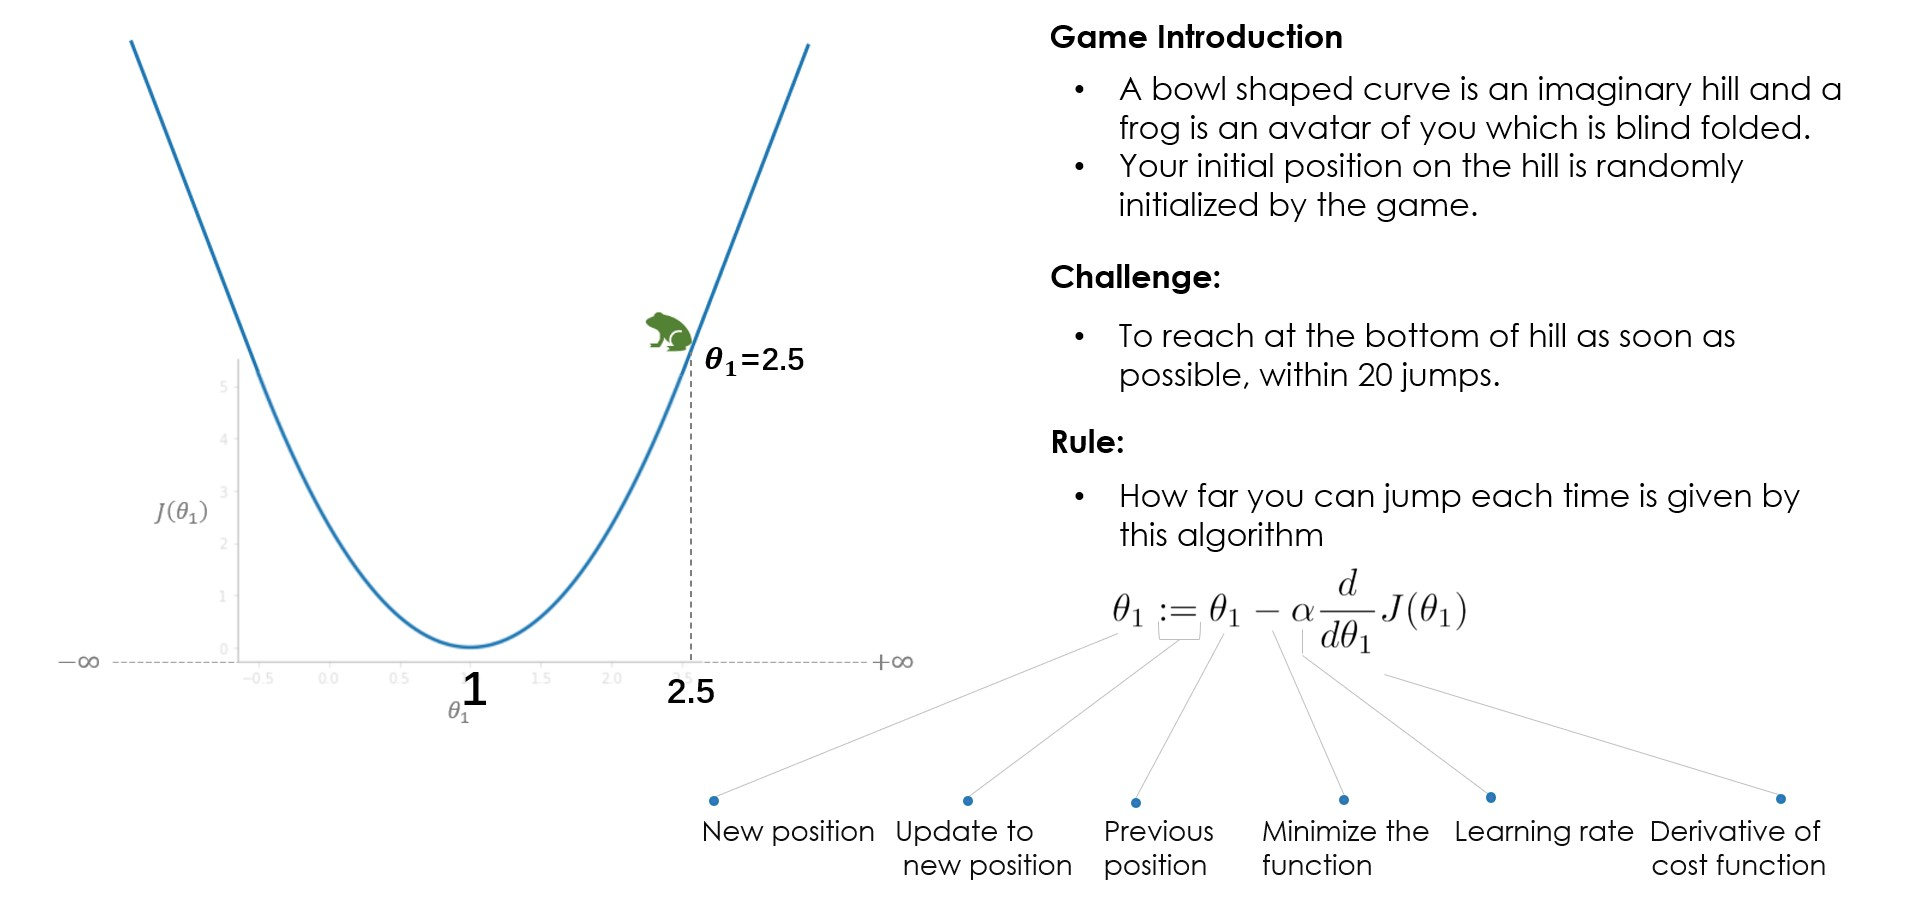

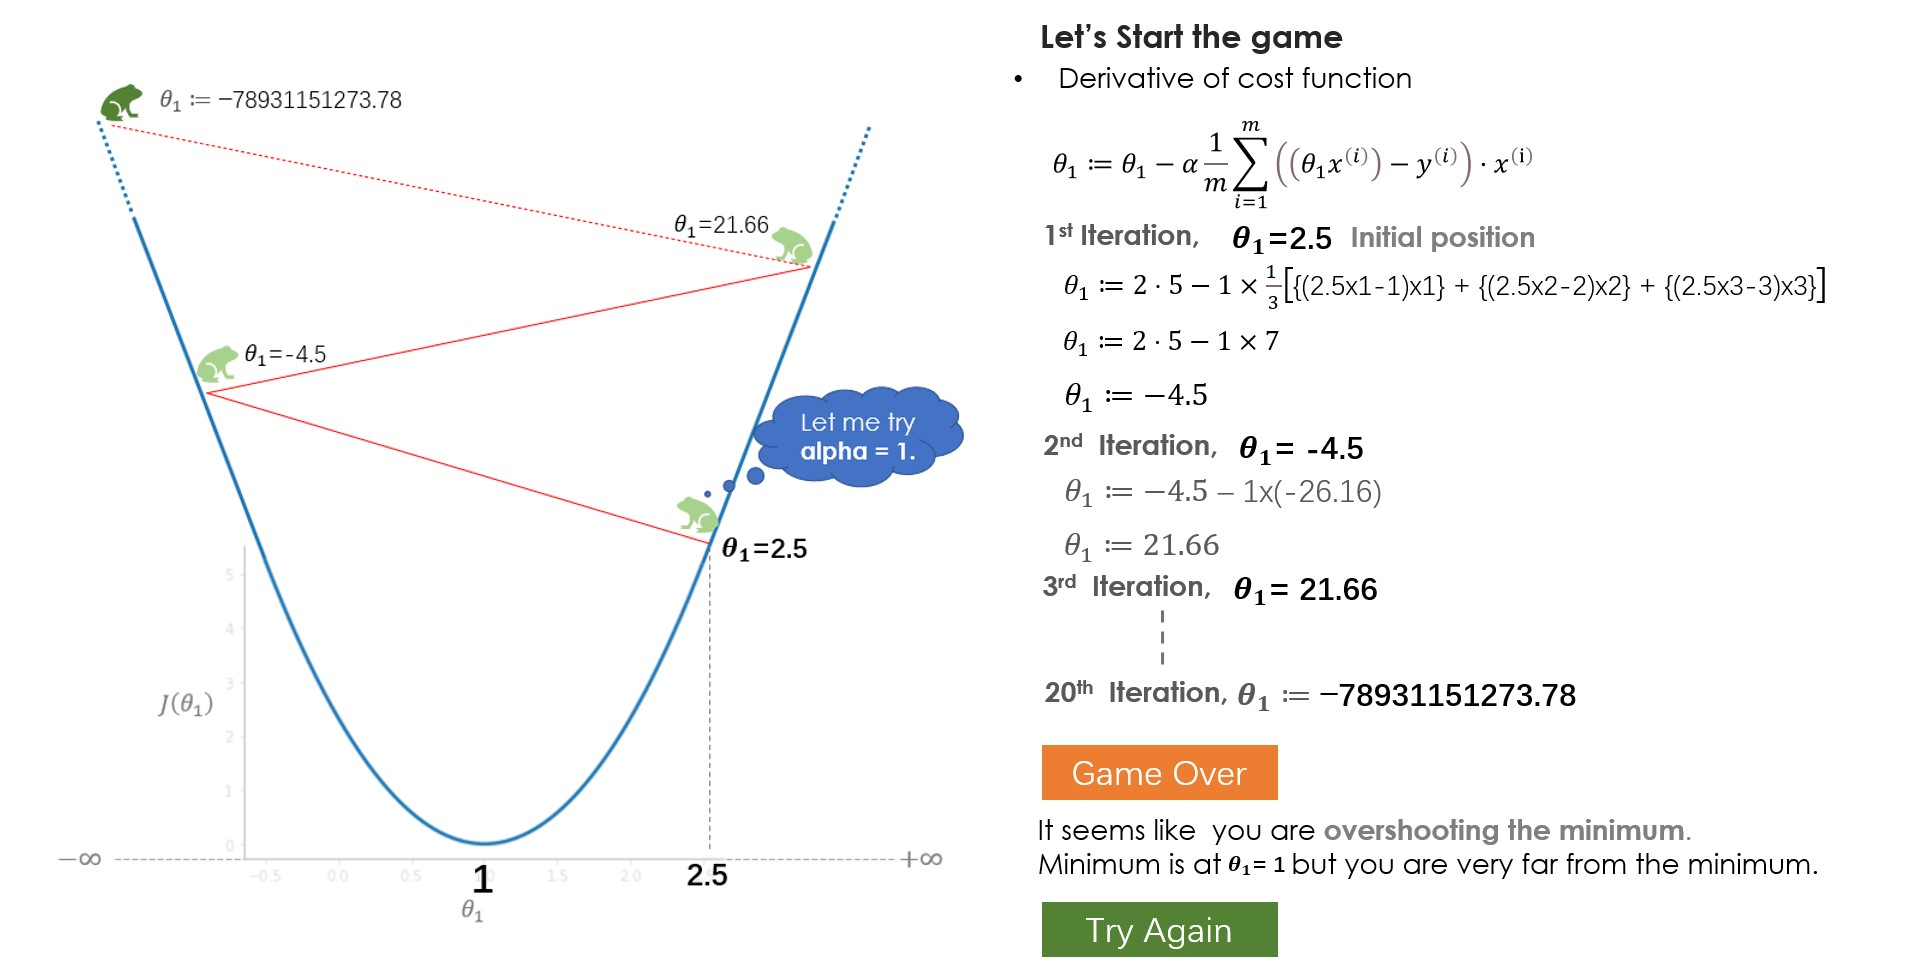

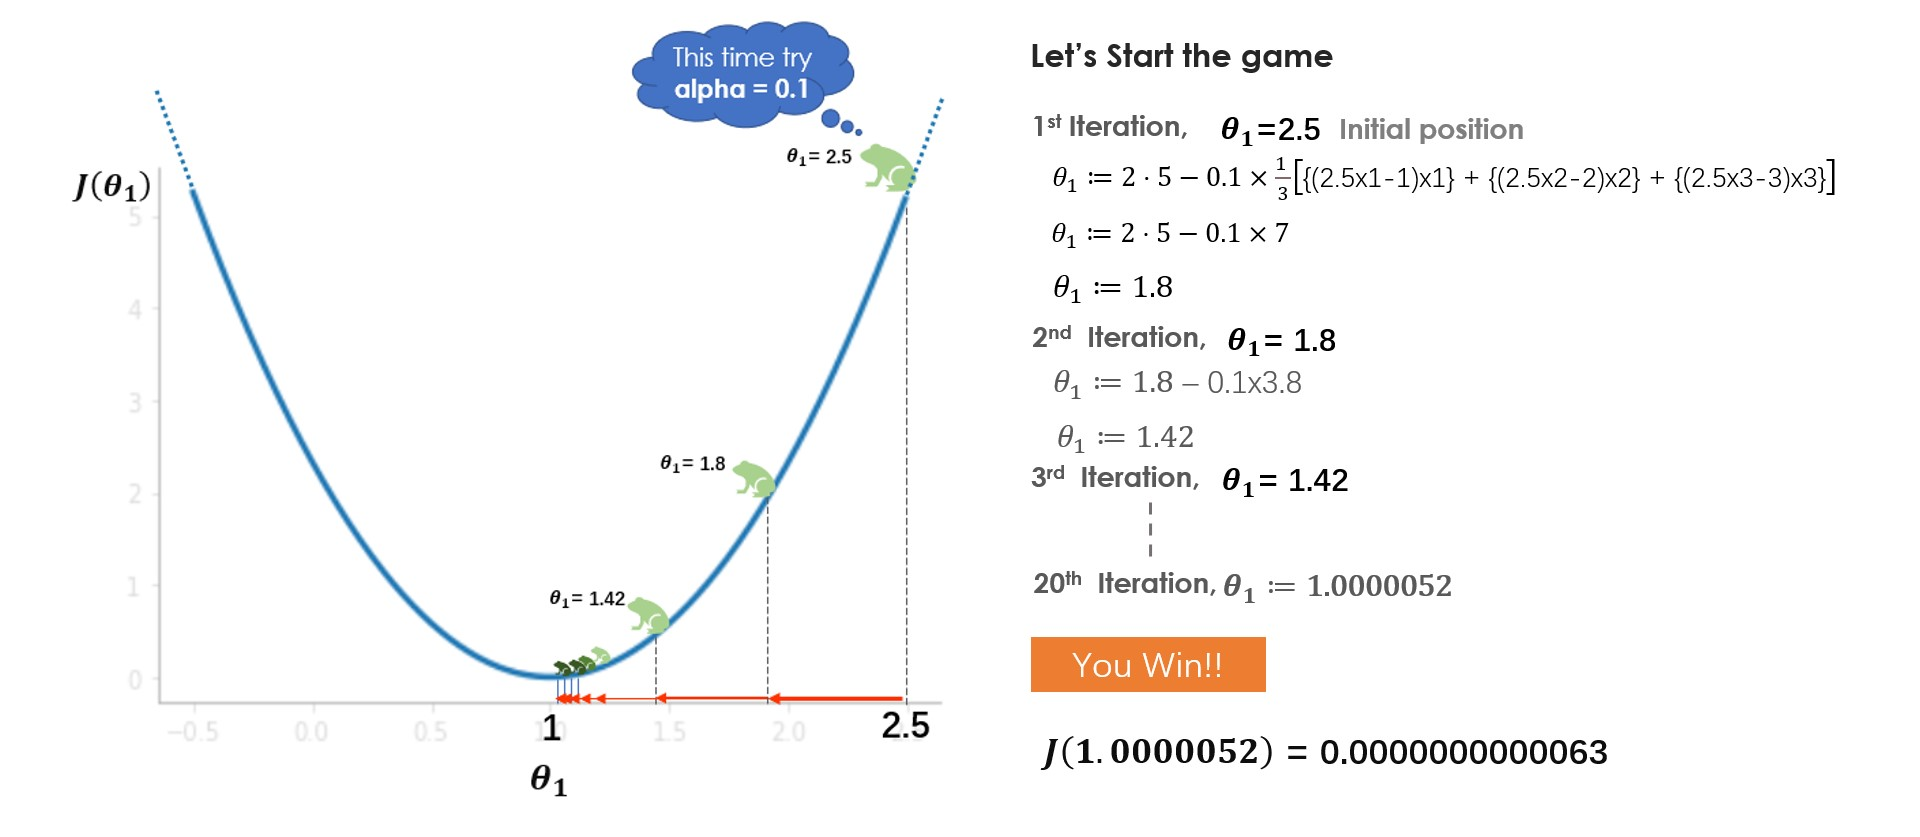

What did you learn from the game? In the beginning, you try with learning rate (alpha)=1 but you fail to reach the minimum, because of the larger steps it overshoots the minimum. In the next game, you try with alpha=0.1, and this time you managed to reach the bottom very safely. what if you had tried with alpha=0.01, well, in that case, you will be gradually coming down but won’t make it to the bottom, 20 jumps are not enough to reach the bottom with alpha=0.01, 100 jumps might be sufficient. while solving a real-world problem, normally alpha between 0.01–0.1 should work fine but it varies with the number of iterations that the algorithm takes, some problems might take 100 or some might even take 1000 iterations.

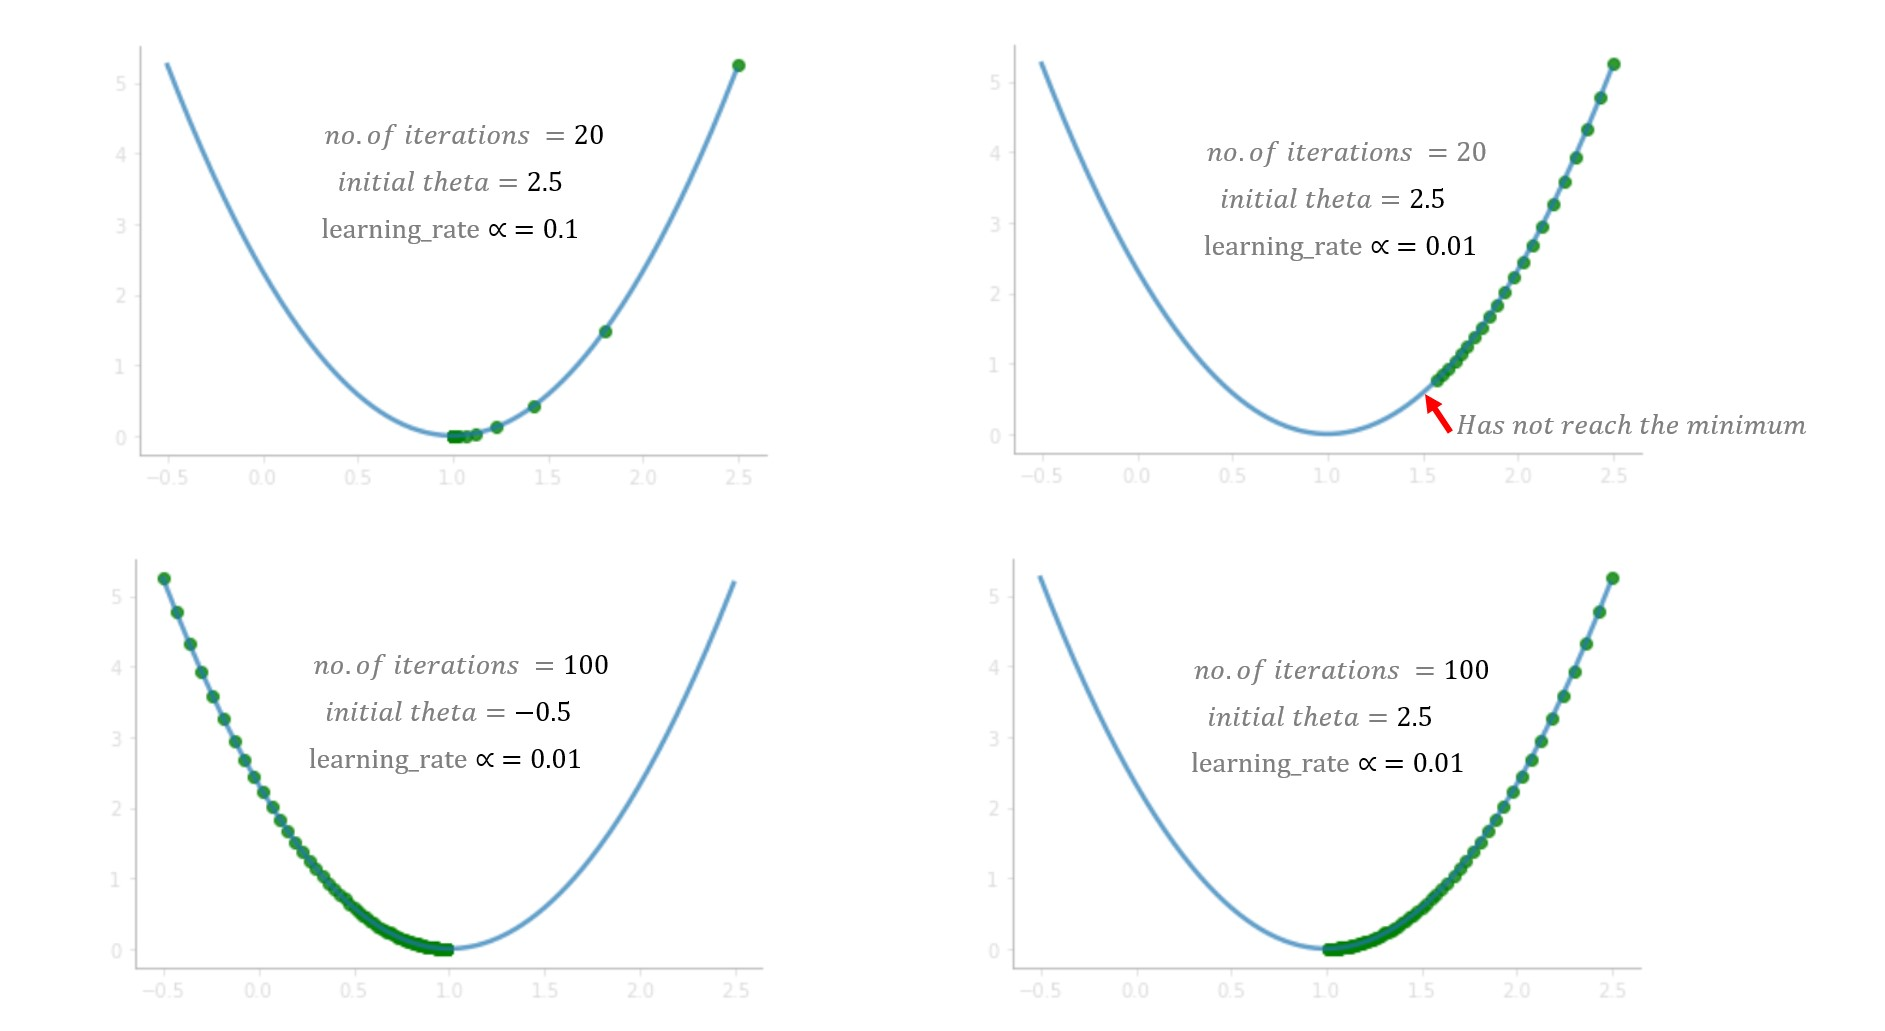

## Task

In this project, I will build a Gradient Descent model from scratch. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Let's use a simple math function to show what is the gradient descent.

In [13]:
f = lambda x: x**3-3*x**2+6

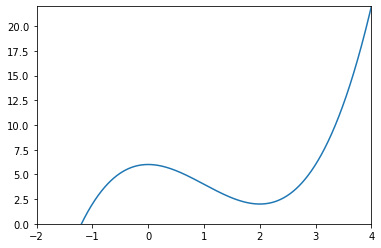

In [18]:

x = np.linspace(-2,4,1000)
plt.plot(x,f(x))
plt.xlim([-2,4])
plt.ylim([0,22])
plt.show()

In [25]:
x_old = 0
x_new = 4 # The algorithm starts at x=4
n_k = 0.05 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-6*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 2.0001918587194885
Number of steps: 24


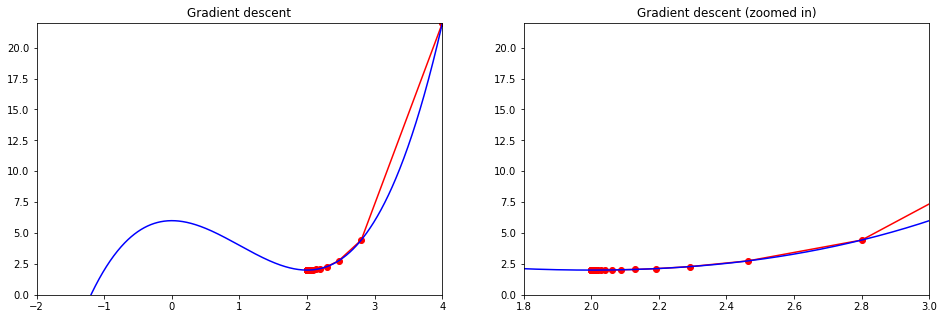

In [28]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-2,4])
plt.ylim([0,22])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([1.8,3])
plt.ylim([0,22])
plt.title("Gradient descent (zoomed in)")
plt.show()

In [30]:
x_old = 0
x_new = 1 # The algorithm starts at x=1
n_k = 0.05 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-6*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 1.999826176943345
Number of steps: 28


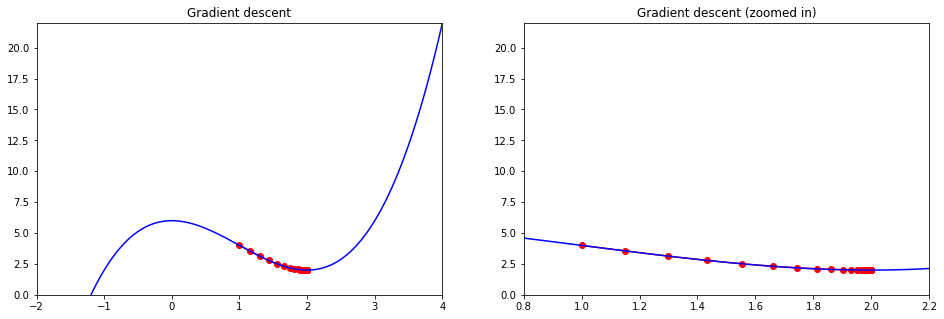

In [33]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([-2,4])
plt.ylim([0,22])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="r")
plt.plot(x_list,y_list,c="r")
plt.plot(x,f(x), c="b")
plt.xlim([0.8,2.2])
plt.ylim([0,22])
plt.title("Gradient descent (zoomed in)")
plt.show()

You'll notice that the step size (also called learning rate) in the implementation above is constant, unlike the algorithm in the pseudocode. Doing this makes it easier to implement the algorithm. However, it also presents some issues: If the step size is too small, then convergence will be very slow, but if we make it too large, then the method may fail to converge at all.

Another approach to update the step size is choosing a decrease constant $d$ that shrinks the step size over time: $\eta(t+1) = \eta(t) / (1+t \times d)$.

As you can guess, we are talking about a line and a line has an equation like $y = ax + b$. Here the coefficient of $x$, $a$ is the slope of the line and $b$ is y-intersect. We can simply say that the fittest line (the solution of linear regression) is strictly related to the values of $m$ and $b$. That's why it is obvious that we have to find the best pair of $a$ and $b$ values.

The common approach to finding the best values is to use a function named _error function_ or _cost function_ to measure how fit the line is.

\begin{equation*}
Error_{a, b} = \frac{1}{N} \sum_{i=1}^N \left( y_i - \left(a x_i + b \right) \right)^2
\end{equation*}

The squared error function makes us enable to calculate the error value positive and differentiate the error function.

In [56]:
# dataset
x = [10.0, 8.00, 13.2, 9.00, 11.0, 14.0, 6.00, 4.00, 12.00, 7.00, 5.00]
y = [8, 6.5, 9.53, 8.2, 8.33, 9.96, 5.84, 4.26, 10.24, 6.82, 5.68]


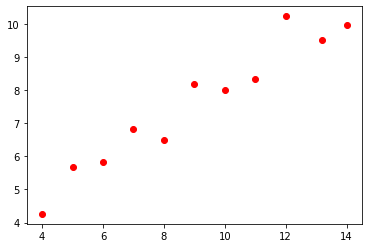

In [57]:
plt.scatter(x, y, color='r')

In [76]:
def Error(a, b):
    # initialize total error
    error = 0.0
    
    # loop within the dataset
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        
        # compute the error for a single point
        # and add it to the total error
        error += (y_i - (a * x_i + b)) ** 2
    # end of for loop
    
    # compute the mean of the error for all dataset
    error = error / float(len(x))
    return error
# end of def computeError

# compute error for the line corresponded by given a and b values
print("total error:", Error(0.75, 0.57))

total error: 0.6824999999999993


In [69]:
# definition of the function to compute the gradient of a.
def gradient_a (a, b):
    # setting default value of gradient
    gradient_a = 0.0
    
    # loop within the dataset
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        
        # compute the first derivative of the error funtion
        # with respect to a
        gradient_a += -x_i * (y_i - (a * x_i + b))
    # end of for loop
    
    # mean of total error
    gradient_a = 2 * gradient_a / float(len(x))
    return gradient_a
# end of def gradientM


# definition of the function to compute the gradient of b.
def gradient_b (a, b):
    # setting default value of gradient
    gradient_b = 0.0
    
    # loop within the dataset
    for i in range(len(x)):
        x_i = x[i]
        y_i = y[i]
        
        # compute the first derivative of the error funtion
        # with respect to b
        gradient_b += -(y_i - (a * x_i + b))
    # end of for loop
    
    # mean of total error
    gradient_b = 2 * gradient_b / float(len(x))
    return gradient_b
# end of def gradientB

print("gradient_a: ", gradient_a(0.8, 0.2))
print("gradient_b: ", gradient_b(0.8, 0.2))

gradient_a:  2.0120000000000036
gradient_b:  -0.3272727272727266


In [87]:
def gradientStep(eta, a, b):
    # compute the derivate with respect to m and b
    dA = gradient_a (a, b)
    dB = gradient_b (a, b)
    
    # compute new value of m and b
    a = a - eta * dA
    b = b - eta * dB
    
    return a, b
# end of def gradientStep

# iteration count
N = 201

# learning rate
eta = 0.01

# initial values
a = b = 0

# Let's start iterating
for i in range(N):
    if i % 10 == 0:
        print(i, "\t error:", Error(a, b),"when" ,"a:",a, "b:",b)
    a, b = gradientStep(eta, a, b)
   # end of for loop

0 	 error: 60.79881818181818 when a: 0 b: 0
10 	 error: 3.0758873979873105 when a: 0.643017537054615 b: 0.11817106857559272
20 	 error: 0.9477720606534267 when a: 0.761479319207531 b: 0.1833764269182309
30 	 error: 0.8442386151775895 when a: 0.7799598596759916 b: 0.23754891642122797
40 	 error: 0.8155136913021971 when a: 0.7794559665829867 b: 0.2887085320350461
50 	 error: 0.7905857210963444 when a: 0.7754179700353716 b: 0.3384050581004315
60 	 error: 0.7668239526951133 when a: 0.7707915207610858 b: 0.38695348547721536
70 	 error: 0.7440883881186707 when a: 0.7661367131500673 b: 0.4344328149876694
80 	 error: 0.7223315866864138 when a: 0.7615585743247832 b: 0.4808766147036266
90 	 error: 0.7015112991323889 when a: 0.7570753550325228 b: 0.5263093827337876
100 	 error: 0.6815872094095949 when a: 0.7526887899955752 b: 0.5707534931430063
110 	 error: 0.6625207410245676 when a: 0.7483975010830941 b: 0.6142305296365297
120 	 error: 0.6442749781393226 when a: 0.744199553492956 b: 0.6567615483

Parameters of the fittest line:
a: 0.713394832927164
b: 0.9688554252363578


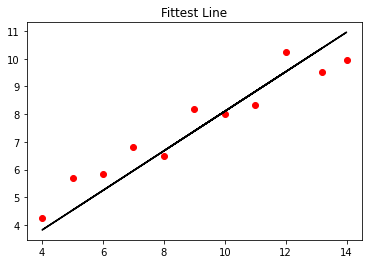

In [94]:
# iteration count
N = 201

# learning rate
eta = 0.01

# initial values
a = b = 0

# lists to keep y-values of line
line = []

# Let's start iterating
for i in range(N):
    a, b = gradientStep(eta, a, b)
# end of for loop

for i in range(len(x)):
    line.append(a * x[i] + b)
# end of for loop

print("Parameters of the fittest line:")
print("a:", a)
print("b:", b)

# drawing of graph.
plt.title("Fittest Line")
plt.scatter (x, y, color= 'r')
plt.plot(x, line, color ='k')
plt.show()

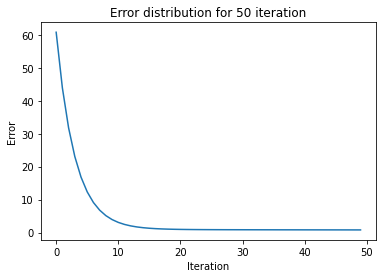

In [96]:

# iteration count
N = 50

# learning rate
eta = 0.01

# initial values
a = b = 0

# lists to keep the error and the iteration values.
errors = []
Ns = []

# Let's start iterating
for i in range(N):
    errors.append(Error(a, b))
    Ns.append(i)
    a, b = gradientStep(eta, a, b)
# end of for loop

# drawing of graph.
plt.title("Error distribution for %s iteration" % N)
plt.ylabel("Error")
plt.xlabel("Iteration")
plt.plot(Ns, errors)
plt.show()